In [1]:
import itertools
import math
%reload_ext autoreload
%autoreload 2

In [54]:
import numpy as np
import os
import sys
from time import perf_counter
import matplotlib.pyplot as plt
from helpers import *
from tqdm import tqdm
import random
import pickle
import math
EPS = 1e-09

In [4]:
os.getcwd()

'/Users/jdodinh/Dropbox/2 - SPRING 2022/CS-498 - Semester Project/code'

# Log

## Description of the problem

We are interested in the problem involving complete $0/1$ matrices. Such a matrix is a $m \times 2^m -1$, where the columns are all the distinct binary strings on $m$ bits. Given an integer vector $b$ we want to determine whether there exists a $(2^m -1)$- bit binary vector $\mathbf{x}$ such that $\mathbf{Ax}=\mathbf{b}$.

The problem can be divided into two parts: feasibility and solution. With feasibility, we want to explore whether given an integer vector $b$ i a solution exists (yes or no), and with the latter we wish to investigate the properties needed for solving the problem (i.e.: outputting the vector $x$
.

We wish to explore properties of the problem (or in particular the vector $b$) to determine partial solutions to the problem to reduce the general problem to simpler problems.



## Week 3

It is easy to find a solution for a rhs of the form $\mathbf{b} = [b \quad ... \quad b]$. Since each vector has a complement, we can simply choose $b$ vector complement pairs to build the solution. As a result we choose to simplify the problem and decompose it. For each potential right-hand side, we can find an $l \geq 0$ such that $\mathbf{b} = l \cdot \mathbf{1} + \mathbf{u}$.

We need to have that $\mathbf{u}$ is minimal feasible solution with regards to the $l_{\infty}$ norm, which implies that $\mathbf{u} - \mathbf{1}$ should not be feasible.

We will therefore try to enumerate the set $U$ of vectors that are feasible and minimal with regards to the $l_{\infty}$ norm. We will also try to find their minimal support solutions, and find if there is a case where more than one solution is possible.

To find such vectors, we simply choose vectors one by one, and automatically remove their complement from consideration

In [5]:
m = 4
dt = bool

time_start = perf_counter()
complete_mat = make_complete(m, dt=dt)
time_stop = perf_counter()

df = pd.DataFrame(complete_mat.astype(int))

print("m =", m, "\t Datatype =", dt)
print("Time taken =", 1000*(time_stop-time_start), "ms")

# print(df.to_string(header=False, index=False))

m = 4 	 Datatype = <class 'bool'>
Time taken = 1.138267999998277 ms


It is useful to state some facts about the solution. Given a $\mathbf{u}$ that is minimal feasible, we have that $\mathbf{Ax} = l \cdot \mathbf{1} + \mathbf{u}$. Then suppose that $\mathbf{A\hat{x}} = l \cdot \mathbf{1}$ and $\mathbf{A\tilde{x}} = \mathbf{u}$. Then any vector from $A$ that is chosen to create $\mathbf{u}$ cannot be a vector chosen to create $l \cdot \mathbf{1}$.

Upon choosing columns of $\mathbf{A}$ to enumerate the set $U$ we need to remember that this imposes a constraint on the number of complement pairs columns that can be chosen. Suppose $\mathbf{u}$ is made of $k$ vectors. Since none of these columns sum up to $\mathbf{1}$, in particular it doesn't contain any vector complement pairs.

Suppose we have the given decomposition $\mathbf{Ax} = k \cdot \mathbf{1} + \mathbf{u}$. Then it must hold that at least $2k$ vectors are already chosen, in order to yield the $k \cdot \mathbf{1}$ vector. There are $\binom{2^{m-1}}{k}$ ways of choosing those vectors, if only pairs are considered.

TODO:

 - Investigate properties of vectors that add up to $\mathbf{1}$
 - Given an integer $m$ find the number of minimal feasible vectors $\mathbf{u}$ that can be created, and for each, one determine how many non minimal vectors are feasible
    - Derive an enumeration technique

## Greedy algorithm for finding a solution

In [4]:
b = np.array([0, 1, 2, 1])
os.getcwd()

# find_solution(b)

'/Users/jdodinh/Dropbox/2 - SPRING 2022/CS-498 - Semester Project/code'

Goals for Week 4:

- Find a counter example for the uniqueness of the support minimal solution, if it's possible.
- If not try to derive a proof ro prove uniqueness or non-uniqueness of the support minimal solution.
- If the solution is not unique, is there a particular property that relates them in a certain way, or are they seemingly random.
- Think about an interpretation for what it means to have a unique solution in the polytope view.

- Have a look at the proof

### Idea

We can try to formulate the support minimal solution as a linear programming problem. To this extent we way that $u$ is our minimal solution. Then it is possible to formulate the linear program as:
$$\min \quad \mathbf{1}^\top \mathbf{x} \\
 \text{st} \quad \quad \mathbf{Ax} = \mathbf{b} \\
 \quad \quad \quad  x \in [0,1], \forall x$$

This is an idea for the further investivation of the problem. As we can see, we are only allowing to make sure that values chosen for $x$ are always between $0$ and $1$, which is a relaxation of the integer problem. On top of this, we impose that the linear combination of the chosen columns is always exactly the vector $\mathbf{b}$. Also, the cost function makes sure that we simply choose the minimum number of columns.

Meeting Notes:

 - Look at the relationship between the fractional solutions and the integer solutions. We may be interested if a fractional solution implies an integral solution, try to find a counterexample as a a good starting point.
 - If there exists a fractional sol $x$ then there exists a fractional solution $x'$ which has at most $m$ fractional entries. This may allow us to solve a smaller version of the problem with all the integral columns removed. Then the problem is not complete anymore, but it bounds the fractionality.
 - The fractionality is the largest number in the denominator for a fractional solution.

Take any m columns we want, with fractional multiplicity, see if it is possible to construct an integral solution, such that this solution cannot be obtained using the complete matrix.

CPLEX from IBM

In [6]:
b = np.array([0, 0, 9])
splx_int_prog, var_int = splx_int(b)
splx_rel_prog, var_rel = splx_rel(b)

In [7]:

int_t1 = perf_counter()
sol_int = splx_int_prog.solve()
int_t2 = perf_counter()
print("Time to solve integer program =", int_t2-int_t1)

rel_t1 = perf_counter()
sol_rel = splx_rel_prog.solve()
rel_t2 = perf_counter()
print("Time to solve relaxation program =", rel_t2-rel_t1)


Time to solve integer program = 0.005495458999998704
Time to solve relaxation program = 0.002755248999999793


In [8]:
print("\n##################################################\n"
      "################ INTEGER SOLUTION ################\n"
      "##################################################\n")

splx_int_prog.print_solution()

print("\n##################################################\n"
      "############### RELAXATION SOLUTION ##############\n"
      "##################################################\n")

splx_rel_prog.print_solution()


##################################################
################ INTEGER SOLUTION ################
##################################################


##################################################
############### RELAXATION SOLUTION ##############
##################################################



There support minimal solution is not unique. This is demonstrated by the example when $\mathbf{b} = [0 \quad 1 \quad 2 \quad 1]$, which can be composed using two pairs of vectors. Namely $\mathbf{u_1} = [0 \quad 1 \quad 1 \quad 1]$ and $\mathbf{u_2} = [0 \quad 0 \quad 1 \quad 0]$ or  $\mathbf{v_1} = [0 \quad 1 \quad 1 \quad 0]$ and $\mathbf{v_2} = [0 \quad 0 \quad 1 \quad 1]$.

This however is a particular version of the problem. Namely there is one $\mathbf{0}$ entry. This allows us to consider a smaller problem where $m = 3$, by completely ignoring the given row. We can see that by doing so, we are left with a vector $\mathbf{b} = [1 \quad 2 \quad 1]$ which can be decomposed into $\mathbf{1}$ and $u = [0 \quad 1 \quad 0]$, l and therefore is not minimal feasible.

Therefore to proceed further it would be good to find a support minimal solution that doesn't have any zero entries.

To do this we will run an algorithm with $m = 4$, testing all possible combinations of the binary strings, while filtering for the ones that are maximal in their decomposition.

In [45]:
from helpers import *
min_feas = find_min_feas2(6)
# enumerate_frac(m)

  0%|          | 395/2760681 [00:25<48:47:59, 15.71it/s]


KeyboardInterrupt: 

Since the execution for $m=4$ took over 20 minutes, we save tha variable to a file.

In [36]:
# with open("min_feas4.pkl", "wb") as f:
#     pickle.dump(min_feas, f)
#     f.close()



Find one solution, then penalize columns with a larger factor one by one to find another solution with the same number of columns.

In [43]:
pickle_in = open('min_feas4.pkl', 'rb')
min_feas4 = pickle.load(pickle_in)
pickle_in = open('min_feas5.pkl', 'rb')
min_feas5 = pickle.load(pickle_in)

m=4
max_gap = 0
for mf in min_feas4:
    gap = np.max(mf)-np.min(mf)
    if (gap>max_gap): max_gap = gap

print("Maximum gap =", max_gap)


Maximum gap = 4


In [16]:
# from helpers import splx_int
mult_min_feas = []
for b_min in tqdm(min_feas):
    # print("Testing minimality of vector: ", b_min, end="\t")
    int_prog, vars = splx_int(b_min)
    int_prog.solve()
    # sol = int_prog.get_var_by_name('x')
    values = {}
    non_zeros = []
    for i in range(2**m):
        varname = int_prog.get_var_by_index(i)
        val = int(int_prog.solution.get_value(varname))
        if val == 1:
            non_zeros.append(i)
            values[str(varname)] = val
    opt_val = int_prog.objective_value
    # print("Optimal value is: ", opt_val)
    w = np.ones(2**len(b_min))
    for nz in non_zeros:
        varname = int_prog.get_var_by_index(nz)
        w[nz] = sys.maxsize
        obj_fun = sum([w[i]*vars[i] for i in range(2**m)])
        int_prog.set_objective("min", obj_fun)
        sol = int_prog.solve()
        # print("\t Penalizing variable ", varname, "\t New objective value = ", sol.objective_value)
        if (sol.objective_value == opt_val):
            mult_min_feas.append(b_min)
            break
            # print("FOUND A SECOND SUPPORT MINIMAL SOLUTION")
        w[nz] = 1
        # int_prog

print("Found", len(mult_min_feas), "rhs with >1 minimal solutions")



  0%|          | 0/705 [00:28<?, ?it/s]


KeyboardInterrupt: 

In [74]:
# n_sevens = []
# for b in filt_sup_min:
#     if 7 in b:
#         n_sevens.append(b)

Simple facts: There cannot exist a maximal decomposition such that $\mathbf{b} = \mathbf{u} + k\mathbf{1}$ with $\mathbf{u}$ containing the value $2^{m-1}$ inb one of it's entries. This is because, if this is the case, then $\mathbf{u}$ must necessarily contain the $\mathbf{1}$ vector, which contradicts the maximality of the decomposition.

On the other hand, $\mathbf{u}$ can contain only one extry of value $2^{m-1}-1$, in which case all of it's other values are $2^{m-2}-1$. This is because it forces $u$ to use up all the columns from one side of the matrix (except the 1 column), in which case using any other column would contradict maximality.

# WEEK 6

Possible proof: If an integral solution exists, then the relaxation of the linear program will output this solution.

In [86]:
def n_supp_min(m, i):
    return int(math.factorial((2**(m-1)-1))/math.factorial((2**(m-1)-1-i)) * m)
    # return math.factorial(i)*m

In [87]:
sum = 0
m = 4
for i in range((2**(m-2))):
    sum += n_supp_min(m, i)
2* sum

2080

## Investigating multiple support minimal solutions

In [32]:
b = np.array([6, 4, 3, 2])
int_prog, vars = splx_int(b)
int_prog.parameters.mip.pool.intensity.set(4)
int_prog.parameters.mip.pool.absgap.set(0)
int_prog.parameters.mip.pool.relgap.set(0)
int_prog.parameters.mip.limits.populate.set(2)
sol_pool = int_prog.populate_solution_pool()




In [21]:
from helpers import *
m = 4
mult_supp_min_sol_min_feas = []
A = make_complete(m, bool).astype(int)
A_sh = A[:,1:-1]
x_counter = np.zeros(2**m-2, dtype=int)
b_ones = np.ones(m, dtype=int)
for b in tqdm(min_feas):
    model, siz = splx_int_mult(A, b, name="test_prog")
    if siz>1:
        mult_supp_min_sol_min_feas.append(b)

 16%|█▌        | 114/705 [00:04<00:21, 27.53it/s]


KeyboardInterrupt: 

## Investigating Fractional Solutions

Fractional solutions don't imply integral solutions.


Looking for counter example of fractional solution not implying integer solution

In [19]:
def find_min_feas(m):
    frac = []
    A = make_complete(m, bool).astype(int)
    A_sh = A[:,1:-1]
    b_counter = np.zeros(2**m-2, dtype=int)
    b_ones = np.ones(m, dtype=int)
    for i in tqdm(range(2**(2**m-2))):
        binary = np.array(list(bin(i).replace("0b", "")), dtype=int)
        b_counter[2**m-2-len(binary):] = binary
        b = A_sh@b_counter
        int_prog, vars = splx_int(A, b-b_ones)
        if (int_prog.solve() is None):
            rel_prog, x = splx_rel(A, b-b_ones)
            if ((rel_prog.solve() is not None) and np.all(b > 0)):
                # print("Found fractional solution, but no integer solution")
                rel_prog.print_solution()
                break

    return frac

fr = find_min_feas(4)

100%|██████████| 16384/16384 [09:32<00:00, 28.60it/s]


In [14]:
import itertools
m = 3
A = make_complete(3, int)
A_sh = A[:, 1:]
ind = np.arange(0, 7)
max = 2**(m-1)*np.ones(m, dtype=int)
for comb in itertools.combinations(ind, 2):
    subsets = A[:, comb]
    summ = np.sum(subsets, axis=1)
    if np.all(summ==1): # If there is an exact set cover
        continue
    else:
        b = max - summ + np.ones(m, dtype=int)
        prog, x = splx_int(A, b)
        if (prog.solve() is not None):
            print(comb)
            print(subsets)
            prog.print_solution()
            break



(3, 5)
[[0 1]
 [1 0]
 [1 1]]
objective: 6
  x_2=1
  x_3=1
  x_4=1
  x_5=1
  x_6=1
  x_7=1


In [42]:
m = 6
A = make_complete(m, int)
A_sh = A[:, 1:]
b = np.zeros(m, dtype=int)
base = 2**(m-1)+1
for i in tqdm(range(base**m)):
    b_conv = numberToBase(i,base)
    b[m-len(b_conv):] = b_conv
    if (np.all(b[:-1] >= b[1:])):
        int_prog, x_int = splx_int(A, b)
        rel_prog, x_rel = splx_rel(A, b)
        if (int_prog.solve() is None):
            if rel_prog.solve() is not None:
                print("Found counterexample!", b)

  0%|          | 753727/1291467969 [00:25<12:02:01, 29793.77it/s]


KeyboardInterrupt: 

In [5]:
for m in range(1, 6):
    print("Number of sorted arrays for m =", m, "is", countSortedArrays(2**(m-1)+2, m))
    enumerated = enumerateSorted(2**(m-1)+1, m)
    print("Length of enumerated is", len(enumerated))

# m=1
# enumerateSorted(2**(m-1)+1, m)

4
Number of sorted arrays for m = 1 is 3
Length of enumerated is 3
Number of sorted arrays for m = 2 is 10
Length of enumerated is 10
Number of sorted arrays for m = 3 is 56
Length of enumerated is 56
Number of sorted arrays for m = 4 is 715
Length of enumerated is 715
Number of sorted arrays for m = 5 is 26334
Length of enumerated is 26334


## Week 11
Trying to enumerate guesses, below is code for trying the simplex program without the objective function

In [86]:
from helpers import *
b = np.array([16, 16, 16, 16, 15])
m = len(b)
A = make_complete(m, int)[:, 1:]
IP, vars = splx_IP_mult(A, b)

In [87]:
pool = IP.populate_solution_pool()
pool.size

1

### Question 1
We try to find the number of solutions in general for $\mathbf{1}\cdot 2^{m-3}\leq b \leq \mathbf{1}\cdot 2^{m-2}$

In [64]:
m = 4
unsc_ub = 2**(m-2) - 2**(m-3) + 1 # base for our counting, which will be scaled by the vector filled with 2**(m-3)
b_up = 2**(m-2) * np.ones(m, dtype=int)
b_counter = np.zeros(m, dtype=int)
sol_dict = {}
A = make_complete(m, int)[:, 1:]
for i in tqdm(range(unsc_ub**m)):
    b_conv = numberToBase(i,unsc_ub)
    b_counter[m-len(b_conv):] = b_conv
    b = b_up-b_counter
    if (np.all(b[:-1] >= b[1:])):
        print(b)
        # IP, vars = splx_IP_mult(A, b)
        # pool = IP.populate_solution_pool()  ## This is the buggy version
        # if pool.size in sol_dict:
        #     sol_dict[pool.size].append(b)
        # else:
        #     sol_dict[pool.size] = [b]
        # break

100%|██████████| 81/81 [00:00<00:00, 11324.24it/s]

[4 4 4 4]
[4 4 4 3]
[4 4 4 2]
[4 4 3 3]
[4 4 3 2]
[4 4 2 2]
[4 3 3 3]
[4 3 3 2]
[4 3 2 2]
[4 2 2 2]
[3 3 3 3]
[3 3 3 2]
[3 3 2 2]
[3 2 2 2]
[2 2 2 2]


<BarContainer object of 68 artists>

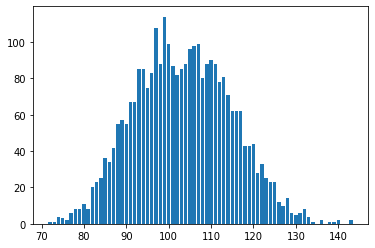

In [33]:
# plt.bar(guesses.keys(), guesses.values())

In [79]:
# with open("./ComputationalResults/guess_hist_"+ str(m) +".pkl", "wb") as f:
#     pickle.dump(sol_dict, f)
#     f.close()

In [25]:
m = 6
pickle_in = open('./ComputationalResults/guess_hist_'+str(m)+'.pkl', 'rb')
guesses = pickle.load(pickle_in)

4


Testing size of a suppost in a support minimal solution for a scaled $k$ vector. With $k = 2^{m-2}$

In [56]:
m = 2
# A = make_complete(m, int)[:, 1:]
b = 2**(m-2)*np.ones(m)

sols = [[m, splx_int(2**(m-3)*np.ones(m))[0].solve().objective_value, splx_int(2**(m-2)*np.ones(m))[0].solve().objective_value] for m in range(3, 10)]

sols_trunc = [[m, splx_int_trunc(2**(m-3)*np.ones(m))[0].solve().objective_value, splx_int_trunc(2**(m-2)*np.ones(m))[0].solve().objective_value] for m in range(3, 10)]

In [60]:
np.array(sols)

array([[  3.,   1.,   3.],
       [  4.,   3.,   5.],
       [  5.,   5.,  11.],
       [  6.,  10.,  22.],
       [  7.,  21.,  47.],
       [  8.,  42.,  93.],
       [  9.,  87., 193.]])